# ARIMA

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('/kaggle/input/ssd-abs/SST_ABSO.csv')['mean temperature deg C']

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.values); axes[0, 0].set_title('Original Series')
plot_acf(df.values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [7]:
df.diff()

0            NaN
1       0.057828
2      -0.164492
3       0.128275
4      -0.255178
          ...   
2947   -0.086434
2948   -0.100462
2949   -0.041708
2950   -0.158804
2951   -0.237849
Name: mean temperature deg C, Length: 2952, dtype: float64

In [8]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.128679
p-value: 0.000000


In [9]:
!pip install pmdarima

import pmdarima
from pmdarima.arima.utils import ndiffs
y = df.values

## Adf Test
ndiffs(y, test='adf')  

# KPSS test
ndiffs(y, test='kpss')  

# PP test:
ndiffs(y, test='pp')  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.9 MB/s eta 0:00:0000:0100:01


0

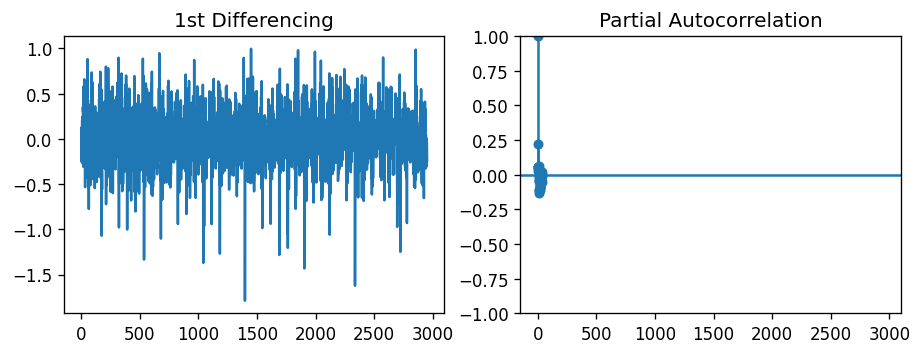

In [10]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.diff().dropna(), ax=axes[1])

plt.show()


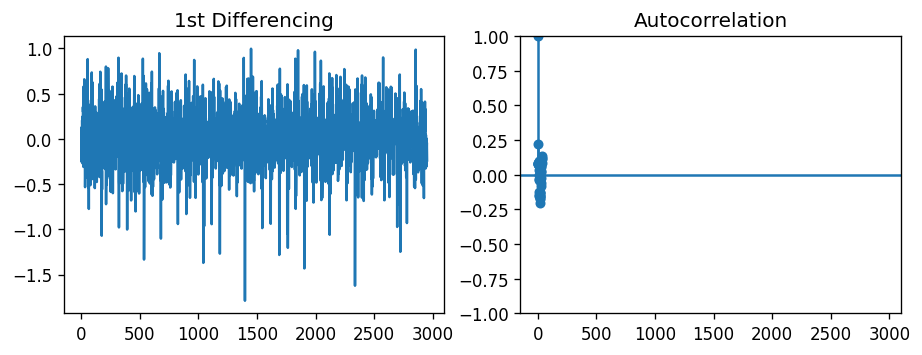

In [11]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.diff().dropna(), ax=axes[1])

plt.show()

In [12]:
# import statsmodels.tsa.arima.model.ARIMA as ARIMA
import statsmodels
# 1,1,2 ARIMA Model
model = statsmodels.tsa.arima.model.ARIMA(df, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 SARIMAX Results                                  
Dep. Variable:     mean temperature deg C   No. Observations:                 2952
Model:                     ARIMA(1, 1, 2)   Log Likelihood                -415.774
Date:                    Fri, 20 Oct 2023   AIC                            839.548
Time:                            09:38:22   BIC                            863.508
Sample:                                 0   HQIC                           848.174
                                   - 2952                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7752      0.070     11.002      0.000       0.637       0.913
ma.L1         -0.5623      0.070     -7.991      0.000      -0.700      -0.424
ma.L2         -0.083

In [13]:
# 1,1,1 ARIMA Model
model = statsmodels.tsa.arima.model.ARIMA(df, order=(0,0,1))
model_fit = model.fit()
print(model_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                 SARIMAX Results                                  
Dep. Variable:     mean temperature deg C   No. Observations:                 2952
Model:                     ARIMA(0, 0, 1)   Log Likelihood               -2569.284
Date:                    Fri, 20 Oct 2023   AIC                           5144.567
Time:                            09:38:23   BIC                           5162.538
Sample:                                 0   HQIC                          5151.037
                                   - 2952                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.2453      0.021   1362.321      0.000      28.205      28.286
ma.L1          0.8593      0.009     92.993      0.000       0.841       0.877
sigma2         0.333

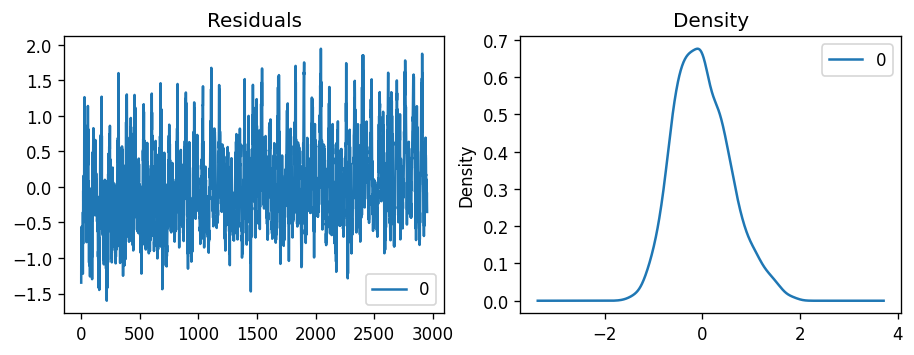

In [14]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

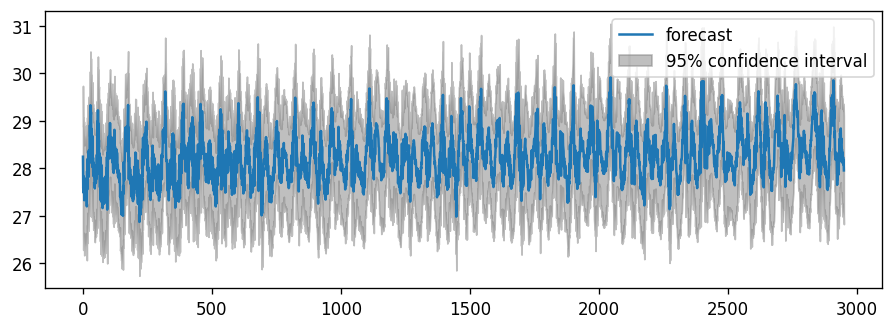

In [15]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
# model_fit.plot_predict(dynamic=False)
plot_predict(model_fit, dynamic=False)
plt.show()

# ARIMA approach

In [36]:
predictions = model.fit().predict()

Mean Squared Error (MSE): 0.07678892583394038
Root Mean Square Error (RMSE): 0.28


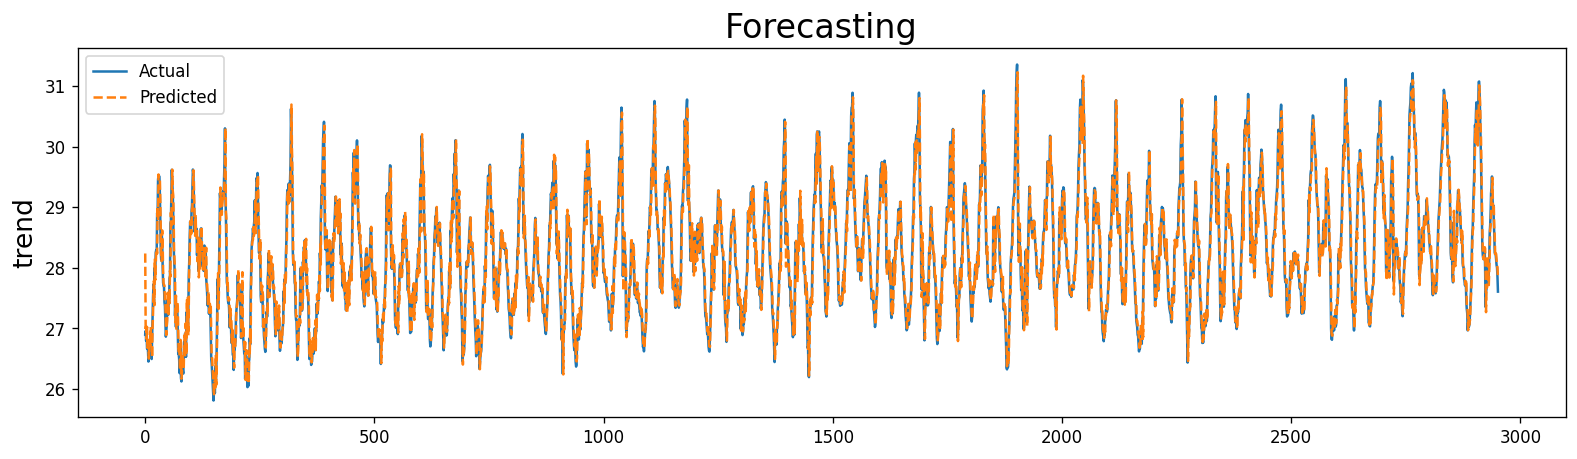

In [37]:
plt.figure(figsize=(16,4))
plt.plot(df, label="Actual")
plt.plot(predictions, label="Predicted", linestyle='dashed')
plt.title('Forecasting', fontsize=20)
plt.ylabel('trend', fontsize=16)
plt.legend()
# Calculate MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df, predictions)
print(f'Mean Squared Error (MSE): {mse}')

import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df, predictions))

print(f'Root Mean Square Error (RMSE): {rmse:.2f}')

In [17]:
# lstm approach

# LSTM approach

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [58]:
data = df  # Replace '...' with your 731 data points
train_data = data[:515]
test_data = data[515:]

In [59]:
def create_sequences(data, window_length):
    X, y = [], []
    for i in range(len(data) - window_length):
        X.append(data[i:i+window_length])
        y.append(data[i+window_length])
    return np.array(X), np.array(y)

window_length = 10
X_train, y_train = create_sequences(train_data, window_length)

In [60]:
mean_train = X_train.mean()
std_train = X_train.std()

X_train = (X_train - mean_train) / std_train

In [2]:
len(df)

2952

In [3]:
ds=list(df)
#print(ds)
dss=[]
for i in range(len(ds)):
    dss.append(ds[i]/int(max(ds)))
print(dss)

[0.8677261116129033, 0.8695915419354839, 0.8642853541935483, 0.8684232706451612, 0.8601917341935484, 0.8611366922580646, 0.8594005635483871, 0.8532622067741935, 0.859919734516129, 0.8627828032258064, 0.8598434899999999, 0.8677929845161291, 0.8633921522580645, 0.8635021354838709, 0.8546104316129033, 0.8659385912903226, 0.8755546580645162, 0.88733171, 0.8943627016129032, 0.8843843435483871, 0.903033416451613, 0.8982466993548387, 0.9025874516129032, 0.9114648577419355, 0.9126051512903226, 0.91109692, 0.9323650883870968, 0.9305977448387097, 0.9501594235483871, 0.9523701896774194, 0.9517247374193548, 0.9518058022580645, 0.9422265467741936, 0.9250313967741935, 0.9113236722580645, 0.906987140967742, 0.9205097961290323, 0.9181556712903225, 0.9043142948387096, 0.8952441064516129, 0.8934801925806453, 0.8928224287096774, 0.8848265658064517, 0.8828575387096774, 0.8743640864516129, 0.8665109690322581, 0.8694158474193548, 0.8727627093548387, 0.8859141112903226, 0.8843803896774193, 0.8780669577419355

Epoch 1/175
65/65 [==============================] - 3s 12ms/step - loss: 0.6507 - val_loss: 0.3920
Epoch 2/175
65/65 [==============================] - 0s 3ms/step - loss: 0.1662 - val_loss: 0.0183
Epoch 3/175
65/65 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 2.8865e-04
Epoch 4/175
65/65 [==============================] - 0s 3ms/step - loss: 2.8783e-04 - val_loss: 3.0957e-04
Epoch 5/175
65/65 [==============================] - 0s 3ms/step - loss: 2.8445e-04 - val_loss: 3.1046e-04
Epoch 6/175
65/65 [==============================] - 0s 3ms/step - loss: 2.8476e-04 - val_loss: 3.0737e-04
Epoch 7/175
65/65 [==============================] - 0s 3ms/step - loss: 2.8336e-04 - val_loss: 3.0443e-04
Epoch 8/175
65/65 [==============================] - 0s 3ms/step - loss: 2.8289e-04 - val_loss: 2.9814e-04
Epoch 9/175
65/65 [==============================] - 0s 3ms/step - loss: 2.8264e-04 - val_loss: 3.0508e-04
Epoch 10/175
65/65 [==============================] - 0s

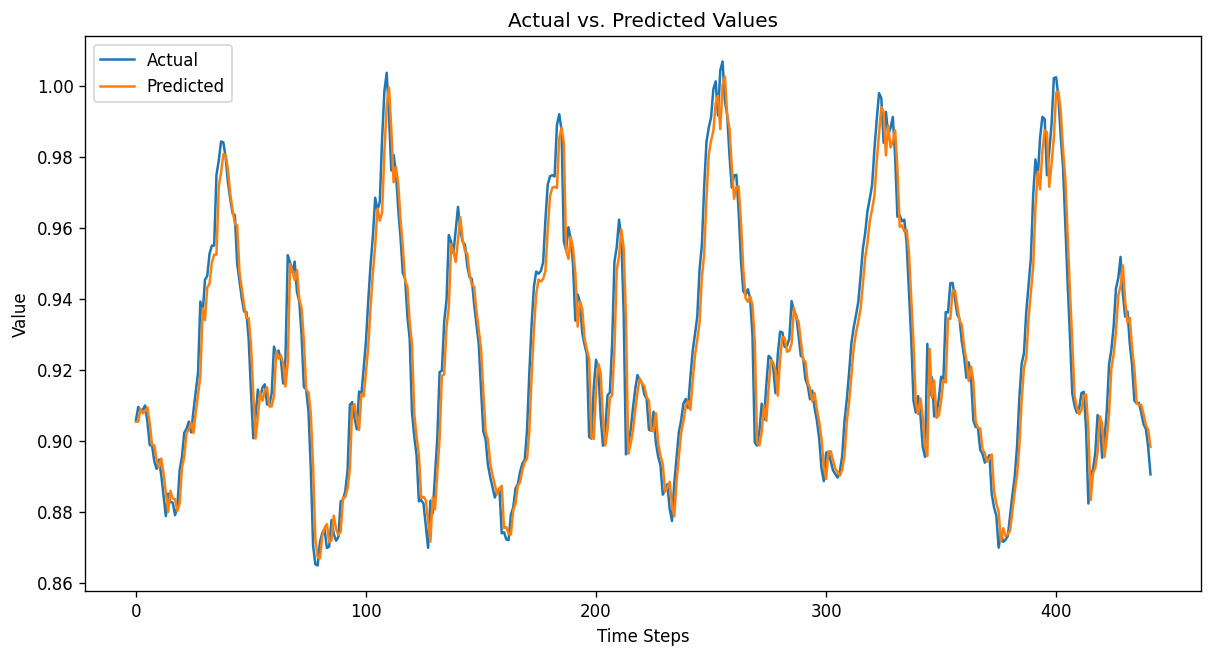

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create a sample dataset (replace this with your custom dataset)
# In this example, we use a sine wave as the dataset.
data = dss
n_points=len(data)

# Define the sequence length and split ratio
sequence_length = 1
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the dataset into training, validation, and testing sets
train_size = int(n_points * train_ratio)
val_size = int(n_points * val_ratio)
test_size = int(n_points * test_ratio)

X = []
y = []

for i in range(n_points - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
    

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape data for LSTM input (batch_size, sequence_length, input_dim)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_val = X_val.reshape(X_val.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Train the model
history = model.fit(X_train, y_train, epochs=175, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and Standard Deviation
mse = mean_squared_error(y_test, y_pred)
std_dev = np.std(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Standard Deviation: {std_dev}')
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Square Error (RMSE): {rmse:.2f}')
import numpy as np

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE between y_test and y_pred
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


# SARIMA Implementation

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89678D-01    |proj g|=  9.07921D-01

At iterate    5    f=  2.39707D-01    |proj g|=  2.36450D-01

At iterate   10    f=  1.57999D-01    |proj g|=  7.61438D-02

At iterate   15    f=  1.48850D-01    |proj g|=  5.40212D-02

At iterate   20    f=  1.45213D-01    |proj g|=  1.71399D-02

At iterate   25    f=  1.43661D-01    |proj g|=  9.98975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     37      1     0     0   

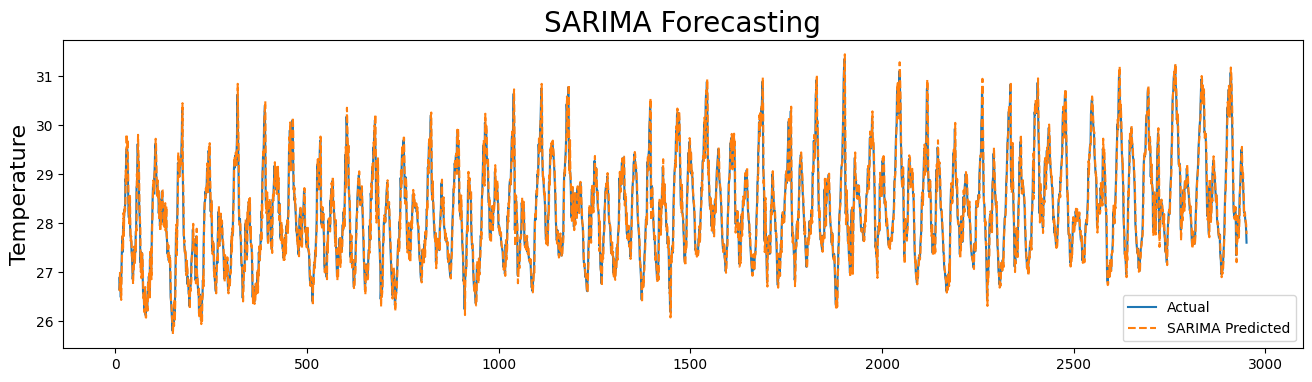

Mean Squared Error (MSE): 0.07814550106564634
Root Mean Square Error (RMSE): 0.28


In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Load your time series data
df = pd.read_csv('/kaggle/input/ssd-abs/SST_ABSO.csv')['mean temperature deg C']

# Non-seasonal and seasonal parameters
d = 1  # Non-seasonal differencing order
D = 1  # Seasonal differencing order
s = 3  # Seasonal period 

p = 1  # Autoregressive order
q = 2  # Moving average order
P = 1  # Seasonal autoregressive order
Q = 1  # Seasonal moving average order

# Create SARIMA model
sarima_model = sm.tsa.SARIMAX(df, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit the SARIMA model
sarima_model_fit = sarima_model.fit()

# Print SARIMA model summary
print(sarima_model_fit.summary())

# Generate SARIMA model predictions
sarima_predictions = sarima_model_fit.predict(start=0, end=len(df)-1)

# Plot actual vs SARIMA predicted values
plt.figure(figsize=(16, 4))
plt.plot(df[10:], label="Actual")
plt.plot(sarima_predictions[10:], label="SARIMA Predicted", linestyle='dashed')
plt.title('SARIMA Forecasting', fontsize=20)
plt.ylabel('Temperature', fontsize=16)
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(df[10:], sarima_predictions[10:])
print(f'Mean Squared Error (MSE): {mse}')
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(df[10:], sarima_predictions[10:]))

print(f'Root Mean Square Error (RMSE): {rmse:.2f}')

# Comparison with another Dataset used previously

In [5]:
from netCDF4 import Dataset
import numpy as np

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ssd-for-2020-to-2022-Gujarat-Area/SST_ANOM_067.50E_072.50E_13.50N_18.50N_20200101_20221231_timeseries.csv
/kaggle/input/kcgrib/kc.grib
/kaggle/input/sst-aboslute-guj-2020-2022/SST_ABSO_067.50E_072.50E_13.50N_18.50N_19820101_20221231_timeseries.csv
/kaggle/input/koreacompare/Koreacompare.nc
/kaggle/input/ssd-abs/SST_ABSO.csv


In [7]:
my_example_nc_file = '/kaggle/input/koreacompare/Koreacompare.nc'
fh = Dataset(my_example_nc_file, mode='r')

In [8]:
print(fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2023-10-25 09:57:34 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data4/adaptor.mars.internal-1698227741.6507006-24693-17-7e79e4e2-676e-4963-9c92-8f30e4562553.nc /cache/tmp/7e79e4e2-676e-4963-9c92-8f30e4562553-adaptor.mars.internal-1698226489.3821433-24693-10-tmp.grib
    dimensions(sizes): longitude(57), latitude(37), time(14976)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 sst(time, latitude, longitude)
    groups: 


In [9]:
temps = fh.variables['sst'][:]

In [10]:
print(temps[0])

[[-- -- -- ... 277.58180023417356 277.5620120689433 277.51358313824835]
 [-- -- -- ... 278.0603613880304 278.16971703798686 278.11972588372106]
 [-- -- 277.06053830271463 ... 278.55142033045377 278.6649419099323
  278.70087305206084]
 ...
 [-- -- -- ... 293.6794726489481 293.8112201700861 293.9752536450207]
 [-- -- -- ... 294.28613613561106 294.30956948917316 294.3757036203373]
 [-- -- -- ... 294.64544755689644 294.59337343786956 294.55223488383837]]


In [11]:
#print(len(temps[0][0]))
tempseries=[]
for i in range(len(temps)):
    tempseries.append(temps[i][0][-1])
#print(tempseries)

In [12]:
import numpy as np


# Convert the normal array to a NumPy array
temp_series = np.array(tempseries)
# Now np_array is a NumPy array
print(temp_series)

[277.51358314 277.3235126  277.19593101 ... 279.87878962 279.1351712
 278.45768692]


In [13]:
ts=temp_series
#print(ds)
tss=[]
for i in range(len(ts)):
    tss.append(ts[i]/int(max(ts)))
#print(tss)

Epoch 1/175
328/328 [==============================] - 4s 5ms/step - loss: 0.1297 - val_loss: 1.3879e-04
Epoch 2/175
328/328 [==============================] - 1s 3ms/step - loss: 1.1652e-04 - val_loss: 1.3743e-04
Epoch 3/175
328/328 [==============================] - 1s 3ms/step - loss: 1.1516e-04 - val_loss: 1.3577e-04
Epoch 4/175
328/328 [==============================] - 1s 3ms/step - loss: 1.1380e-04 - val_loss: 1.3382e-04
Epoch 5/175
328/328 [==============================] - 1s 3ms/step - loss: 1.1165e-04 - val_loss: 1.3149e-04
Epoch 6/175
328/328 [==============================] - 1s 3ms/step - loss: 1.0909e-04 - val_loss: 1.3144e-04
Epoch 7/175
328/328 [==============================] - 1s 3ms/step - loss: 1.0664e-04 - val_loss: 1.2429e-04
Epoch 8/175
328/328 [==============================] - 1s 3ms/step - loss: 1.0319e-04 - val_loss: 1.2293e-04
Epoch 9/175
328/328 [==============================] - 1s 3ms/step - loss: 9.9461e-05 - val_loss: 1.1613e-04
Epoch 10/175
328/328 [=

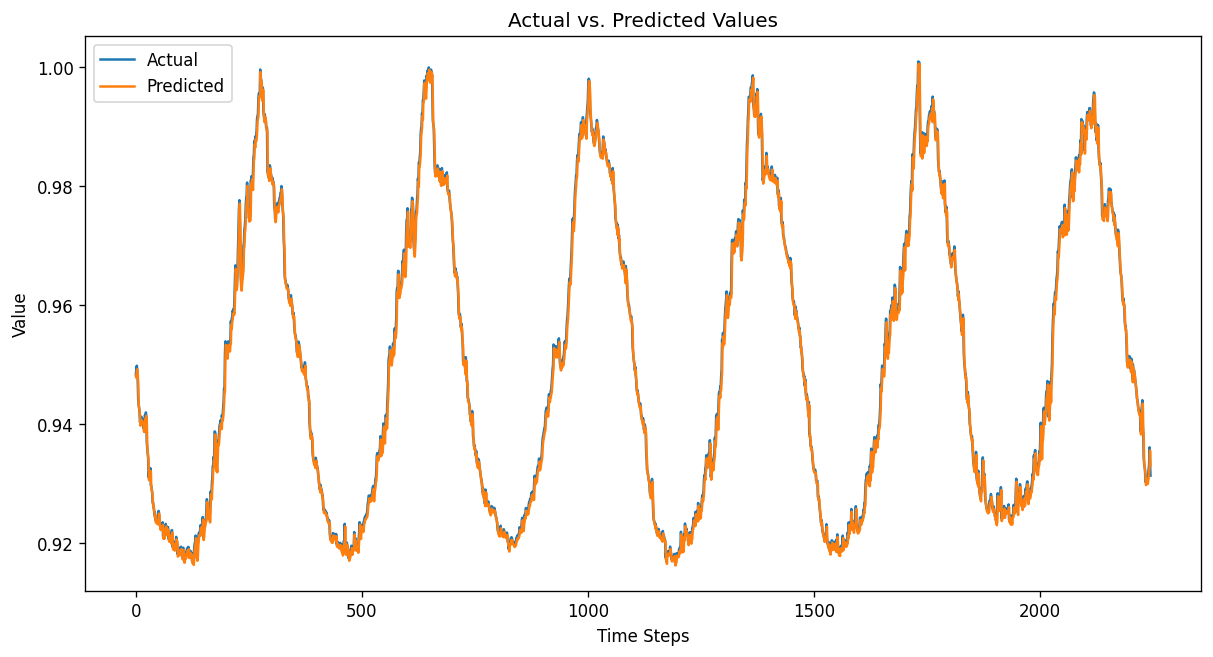

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create a sample dataset (replace this with your custom dataset)
# In this example, we use a sine wave as the dataset.
data = tss
n_points=len(data)

# Define the sequence length and split ratio
sequence_length = 1
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the dataset into training, validation, and testing sets
train_size = int(n_points * train_ratio)
val_size = int(n_points * val_ratio)
test_size = int(n_points * test_ratio)

X = []
y = []

for i in range(n_points - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])
    

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape data for LSTM input (batch_size, sequence_length, input_dim)
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_val = X_val.reshape(X_val.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Train the model
history = model.fit(X_train, y_train, epochs=175, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and Standard Deviation
mse = mean_squared_error(y_test, y_pred)
std_dev = np.std(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Standard Deviation: {std_dev}')
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Root Mean Square Error (RMSE): {rmse:.2f}')
import numpy as np

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE between y_test and y_pred
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
